In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('Call_Data_Project_9.csv')

In [3]:
df.head()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23


In [4]:
df.shape

(117988, 13)

In [5]:
df[df.duplicated(keep=False)]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
40,NaN,NaN,87782XXXXX,16,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:16
42,NaN,NaN,87782XXXXX,16,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:16
285,NaN,NaN,96336XXXXX,120,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:14
312,NaN,NaN,96336XXXXX,120,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:14
4354,NaN,NaN,91779XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:14
4381,NaN,NaN,78499XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:17
4397,NaN,NaN,78499XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:17
4422,NaN,NaN,93589XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:14
4436,NaN,NaN,93589XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:14
4507,NaN,NaN,91779XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:14


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(117047, 13)

In [8]:
dft_1=pd.DataFrame()
dft_1['Null']=df.isna().sum().sort_values(ascending=False)
dft_1=dft_1[dft_1['Null']>0]
dft_1

,Null
Wrapped _By,46936
Agent_Name,33257
Agent_ID,33257


In [9]:
df[df['Agent_Name'].isna()]['Agent_ID'].unique()

array([nan])

In [10]:
df[df['Agent_ID'].isna()]['Agent_Name'].unique()

array([nan], dtype=object)

In [11]:
df[df['Agent_ID'].isna()]['Wrapped _By'].unique()

array([nan], dtype=object)

In [12]:
df[df['Agent_ID'].isna()]['Call_Status'].unique()

array(['abandon'], dtype=object)

In [13]:
df[df['Wrapped _By'].isna()]['Call_Status'].unique()

array(['abandon', 'answered', 'transfer'], dtype=object)

In [14]:
df['Wrapped _By'].value_counts()

Wrapped _By
Agent          60396
AutoWrapped     9715
Name: count, dtype: int64

In [15]:
df[(df['Wrapped _By'].isna()) & ((df['Call_Status']=='answered') | (df['Call_Status']=='transfer'))].fillna('Agent', inplace=True)

In [16]:
df.fillna('Not Available', inplace=True)

In [17]:
dft_1=pd.DataFrame()
dft_1['Null']=df.isna().sum().sort_values(ascending=False)
dft_1=dft_1[dft_1['Null']>0]
dft_1

,Null


In [18]:
col=list(df.dtypes[df.dtypes=='object'].index)

In [19]:
print(col[0], '\n', df[col[0]].unique())

Agent_Name 
 ['Executives 42' 'Executives 4' 'Executives 65' 'Executives 55'
 'Executives 21' 'Not Available' 'Executives 49' 'Executives 50'
 'Executives 59' 'Executives 16' 'Executives 60' 'Executives 6'
 'Executives 51' 'Executives 40' 'Executives 54' 'Executives 41'
 'Executives 15' 'Executives 10' 'Executives 31' 'Executives 46'
 'Executives 22' 'Executives 26' 'Executives 53' 'Executives 23'
 'Executives 47' 'Executives 37' 'Executives 58' 'Executives 24'
 'Executives 38' 'Executives 18' 'Executives 48' 'Executives 9'
 'Executives 30' 'Executives 7' 'Executives 39' 'Executives 13'
 'Executives 62' 'Executives 19' 'Executives 35' 'Executives 25'
 'Executives 29' 'Executives 14' 'Executives 34' 'Executives 33'
 'Executives 43' 'Executives 1' 'Executives 27' 'Executives 12'
 'Executives 28' 'Executives 52' 'Executives 36' 'Executives 5'
 'Executives 3' 'Executives 17' 'Executives 63' 'Executives 8'
 'Executives 61' 'Executives 44' 'Executives 45' 'Executives 64'
 'Executives 57' 'Ex

In [20]:
print(col[1], '\n', df[col[1]].unique())

Agent_ID 
 [1000042.0 1000004.0 1000065.0 1000055.0 1000021.0 'Not Available'
 1000049.0 1000050.0 1000059.0 1000016.0 1000060.0 1000006.0 1000051.0
 1000040.0 1000054.0 1000041.0 1000015.0 1000010.0 1000031.0 1000046.0
 1000022.0 1000026.0 1000053.0 1000023.0 1000047.0 1000037.0 1000058.0
 1000024.0 1000038.0 1000018.0 1000048.0 1000009.0 1000030.0 1000007.0
 1000039.0 1000013.0 1000062.0 1000019.0 1000035.0 1000025.0 1000029.0
 1000014.0 1000034.0 1000033.0 1000043.0 1000001.0 1000027.0 1000012.0
 1000028.0 1000052.0 1000036.0 1000005.0 1000003.0 1000017.0 1000063.0
 1000008.0 1000061.0 1000044.0 1000045.0 1000064.0 1000057.0 1000002.0
 1000011.0 1000020.0 1000056.0 1000032.0]


In [21]:
print(col[2], '\n', df[col[2]].apply(lambda x: len(x)).unique())

Customer_Phone_No 
 [10  5]


In [22]:
df[df[col[2]].apply(lambda x: len(x))==5]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
104000,Not Available,Not Available,XXXXX,120,1/20/2022,10.0,10_11,0:00:00,0.0,abandon,Not Available,YES,0:00:15


In [23]:
df[col[2]].loc[104000]='XXXXXXXXXX'

In [24]:
print(col[3], '\n', df[col[3]].unique())

Date_&_Time 
 ['1/1/2022' '1/2/2022' '1/3/2022' '1/4/2022' '1/5/2022' '1/6/2022'
 '1/7/2022' '1/8/2022' '1/9/2022' '1/10/2022' '1/11/2022' '1/12/2022'
 '1/13/2022' '1/14/2022' '1/15/2022' '1/16/2022' '1/17/2022' '1/18/2022'
 '1/19/2022' '1/20/2022' '1/21/2022' '1/22/2022' '1/23/2022']


In [25]:
print(col[4], '\n', df[col[4]].unique())

Time_Bucket 
 ['9_10' '10_11' '11_12' '12_13' '13_14' '14_15' '15_16' '16_17' '17_18'
 '18_19' '19_20' '20_21']


In [26]:
print(col[5], '(Hour)', '\n', np.sort(pd.Series(df[col[5]].unique()).str.split(':').apply(lambda x: x[0]).unique()))

Duration(hh:mm:ss) (Hour) 
 ['0' '1']


In [27]:
print(col[5], '(Minute)', '\n', np.sort(pd.Series(df[col[5]].unique()).str.split(':').apply(lambda x: x[1]).unique()))

Duration(hh:mm:ss) (Minute) 
 ['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '43' '44' '47' '48' '52' '53']


In [28]:
print(col[5], '(Second)', '\n', np.sort(pd.Series(df[col[5]].unique()).str.split(':').apply(lambda x: x[2]).unique()))

Duration(hh:mm:ss) (Second) 
 ['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59']


In [29]:
print(col[6], '\n', df[col[6]].unique())

Call_Status 
 ['answered' 'abandon' 'transfer']


In [30]:
print(col[7], '\n', df[col[7]].unique())

Wrapped _By 
 ['Agent' 'AutoWrapped' 'Not Available']


In [31]:
print(col[8], '\n', df[col[8]].unique())

Ringing 
 ['YES']


In [32]:
print(col[9], '(Hour)', '\n', np.sort(pd.Series(df[col[9]].unique()).str.split(':').apply(lambda x: x[0]).unique()))

IVR _Duration (Hour) 
 ['0']


In [33]:
print(col[9], '(Minute)', '\n', np.sort(pd.Series(df[col[9]].unique()).str.split(':').apply(lambda x: x[1]).unique()))

IVR _Duration (Minute) 
 ['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '17' '56']


In [34]:
print(col[9], '(Second)', '\n', np.sort(pd.Series(df[col[9]].unique()).str.split(':').apply(lambda x: x[2]).unique()))

IVR _Duration (Second) 
 ['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59']


In [35]:
col=list(df.dtypes[df.dtypes!='object'].index)

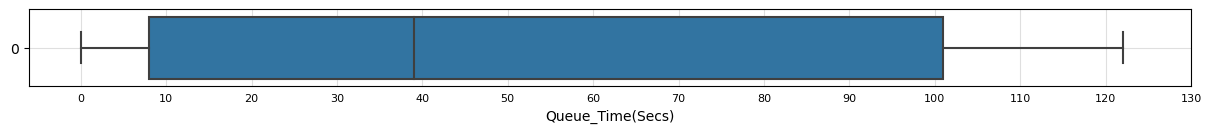

In [36]:
figure,axs = plt.subplots(1,1, figsize=(15,1))
sns.boxplot(df[col[0]], orient='h', ax=axs)
axs.set_xticks(np.arange(0, 140, 10))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel(col[0])
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [37]:
print(col[1], '\n', df[col[1]].unique())

Time 
 [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.]


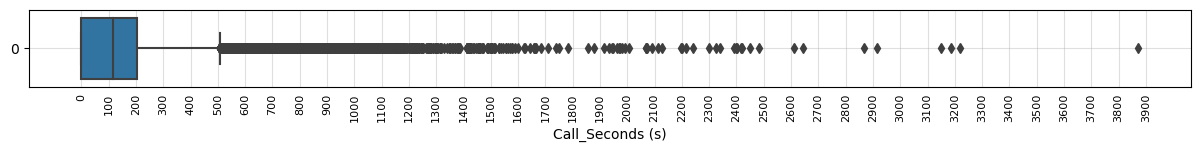

In [38]:
figure,axs = plt.subplots(1,1, figsize=(15,1))
sns.boxplot(df[col[2]], orient='h', ax=axs)
axs.set_xticks(np.arange(0, 4000, 100))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8, rotation=90)
axs.set_xlabel(col[2])
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [39]:
df[df[col[2]]>3000]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
49457,Executives 10,1000010.0,79084XXXXX,4,1/11/2022,17.0,17_18,1:04:32,3872.0,answered,Agent,YES,0:00:24
49844,Executives 43,1000043.0,98961XXXXX,13,1/11/2022,18.0,18_19,0:52:29,3149.0,answered,Agent,YES,0:00:14
52597,Executives 5,1000005.0,98800XXXXX,24,1/12/2022,13.0,13_14,0:53:05,3185.0,answered,Agent,YES,0:00:13
91887,Executives 39,1000039.0,97648XXXXX,108,1/17/2022,18.0,18_19,0:53:39,3219.0,answered,AutoWrapped,YES,0:00:24


In [40]:
df.head()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23


In [41]:
dur_sec=pd.Series(df['Duration(hh:mm:ss)']).str.split(':').apply(lambda x: sum([a*b for a,b in zip([3600,60,1], map(int, x))]))
call_sec=df['Call_Seconds (s)']

In [42]:
df[(dur_sec-call_sec)!=0.0]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration


In [43]:
df['Call_Status'].unique()

array(['answered', 'abandon', 'transfer'], dtype=object)

In [44]:
df[df['Call_Status']=='abandon']['Call_Seconds (s)'].unique()

array([0.])

In [45]:
df[df['Call_Status']=='abandon']['Wrapped _By'].unique()

array(['Not Available'], dtype=object)

In [46]:
d=df.groupby('Agent_ID')['Call_Status'].value_counts().unstack().reset_index()
d.fillna(0, inplace=True)
d['received']=d['answered']+d['transfer']
d.drop(['answered', 'transfer'], axis=1, inplace=True)
d=d[d['received']==0.0]
d

Call_Status,Agent_ID,abandon,received
1,1000002.0,1.0,0.0
10,1000011.0,1.0,0.0
13,1000014.0,1.0,0.0
43,1000044.0,1.0,0.0
44,1000045.0,1.0,0.0
56,1000057.0,1.0,0.0
63,1000064.0,1.0,0.0
65,Not Available,33257.0,0.0


In [47]:
l_id=list(d['Agent_ID'].values)[:-1]
l_nm=[df[df['Agent_ID']==i]['Agent_Name'].values[0] for i in l_id]
df['Agent_ID'].replace(l_id, 'Not Available', inplace=True)
df['Agent_Name'].replace(l_nm, 'Not Available', inplace=True)

In [48]:
df.head()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23


In [49]:
df.to_excel('Call_Data_Project_9_Pre-Proc.xlsx')